<a href="https://colab.research.google.com/github/prasad-dash/CatsVsDogs/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=a0efe643877d0773470e787f8a3de2b68e1f0ca9de9c98ec5df85ace07406774
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


####Importing Libraries
The following libraries have been used:


*   Tensorflow - For deep-learning 
*   Numpy
*   matplotlib.pyplot - For data visualisation
*   os,shutil,random - For data organisation






In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

####Importing Datasets from Kaggle

In [ ]:
!mkdir /root/.kaggle
!cp /content/kaggle.json /root/.kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 528M/543M [00:03<00:00, 202MB/s]
100% 543M/543M [00:03<00:00, 168MB/s]
 98% 267M/271M [00:03<00:00, 57.0MB/s]
100% 271M/271M [00:03<00:00, 89.8MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 81.3MB/s]


In [ ]:
# organize dataset into a useful structure
!unzip /content/train.zip
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

####Creating Data-Generators for batch processing

In [ ]:
DataGen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=1, width_shift_range=0.1,
    height_shift_range=0.1, 
    brightness_range=None, 
    shear_range=0.1, 
    zoom_range=0.2, 
    fill_mode='nearest',
    horizontal_flip=True, 
    vertical_flip=True,
    rescale=1.0/255.0
)
DataGenVal=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,)
trainGen=DataGen.flow_from_directory("/content/dataset_dogs_vs_cats/train",class_mode="categorical",target_size=(224,224))
valGen=DataGenVal.flow_from_directory("/content/dataset_dogs_vs_cats/test",class_mode="categorical",target_size=(224,224))


Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


####Model creation and compilation

In [ ]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(100,3,(2,2),activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,3,(2,2),activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32,3,(2,2),activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1000,activation="relu"))
model.add(tf.keras.layers.Dense(512,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
## test epoch
model.fit(trainGen,epochs=1,validation_data=valGen,batch_size=32)

585/585 [==============================] - 239s 407ms/step - loss: 0.6953 - accuracy: 0.5001 - val_loss: 0.6940 - val_accuracy: 0.4964


####Model Training

In [ ]:
history=model.fit(trainGen,epochs=10,validation_data=valGen,batch_size=16)

Epoch 1/10
585/585 [==============================] - 237s 405ms/step - loss: 0.6929 - accuracy: 0.5113 - val_loss: 0.6865 - val_accuracy: 0.5370
Epoch 2/10
585/585 [==============================] - 237s 406ms/step - loss: 0.6828 - accuracy: 0.5588 - val_loss: 0.6872 - val_accuracy: 0.5440
Epoch 3/10
585/585 [==============================] - 235s 401ms/step - loss: 0.6764 - accuracy: 0.5808 - val_loss: 0.6686 - val_accuracy: 0.5942
Epoch 4/10
585/585 [==============================] - 234s 400ms/step - loss: 0.6673 - accuracy: 0.5937 - val_loss: 0.6572 - val_accuracy: 0.6127
Epoch 5/10
585/585 [==============================] - 234s 400ms/step - loss: 0.6427 - accuracy: 0.6300 - val_loss: 0.6079 - val_accuracy: 0.6649
Epoch 6/10
585/585 [==============================] - 235s 402ms/step - loss: 0.6123 - accuracy: 0.6605 - val_loss: 0.5784 - val_accuracy: 0.6886
Epoch 7/10
585/585 [==============================] - 235s 401ms/step - loss: 0.5920 - accuracy: 0.6772 - val_loss: 0.5715 -

In [ ]:
history=model.fit(trainGen,epochs=5,validation_data=valGen,batch_size=16)

Epoch 1/5
585/585 [==============================] - 239s 409ms/step - loss: 0.5462 - accuracy: 0.7198 - val_loss: 0.5143 - val_accuracy: 0.7357
Epoch 2/5
585/585 [==============================] - 241s 411ms/step - loss: 0.5386 - accuracy: 0.7247 - val_loss: 0.5155 - val_accuracy: 0.7477
Epoch 3/5
585/585 [==============================] - 242s 414ms/step - loss: 0.5345 - accuracy: 0.7269 - val_loss: 0.4961 - val_accuracy: 0.7511
Epoch 4/5
273/585 [=============>................] - ETA: 1:58 - loss: 0.5300 - accuracy: 0.7270

In [ ]:
model.save('/content/DogsVsCats.h5')

####Transfer Learning using VGG16 

In [ ]:
VGGexc = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in VGGexc.layers:
		layer.trainable = False
TRmodel=tf.keras.models.Sequential(
    [VGGexc,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
    ])
TRmodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
TRhistory=TRmodel.fit(trainGen,epochs=5,validation_data=valGen,batch_size=16)

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/5
585/585 [==============================] - 274s 457ms/step - loss: 0.6616 - accuracy: 0.7934 - val_loss: 0.2163 - val_accuracy: 0.9107
Epoch 2/5
585/585 [==============================] - 260s 444ms/step - loss: 0.2942 - accuracy: 0.8747 - val_loss: 0.2241 - val_accuracy: 0.9066
Epoch 3/5
585/585 [==============================] - 260s 444ms/step - loss: 0.2798 - accuracy: 0.8790 - val_loss: 0.1990 - val_accuracy: 0.9186
Epoch 4/5
585/585 [==============================] - 260s 445ms/step - loss: 0.2746 - accuracy: 0.8775 - val_loss: 0.1979 - val_accuracy: 0.9170
Epoch 5/5
585/585 [==============================] - 262s 447ms/step - loss: 0.2683 - accuracy: 0.8820 - val_loss: 0.1784 - val_accuracy: 0.9267


In [ ]:
TRmodel.save("/content/CatsAndDogsVgg16.h5")

####Model summaries and training analysis


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 100)   2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 100)   0         
_________________________________________________________________
dropout (Dropout)            (None, None, None, 100)   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    57664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, None, None, 64)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 32)    1

In [ ]:
TRmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1026      
Total params: 27,561,282
Trainable params: 12,846,594
Non-trainable params: 14,714,688
_________________________________________________________________


Text(0.5, 0, 'Epochs')

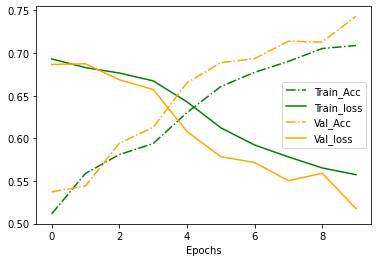

In [ ]:
plt.plot(history.history['accuracy'],color="green",linestyle="-.",label="Train_Acc")
plt.plot(history.history['loss'],color="green",label="Train_loss")
plt.plot(history.history['val_accuracy'],color="orange",linestyle="-.",label="Val_Acc")
plt.plot(history.history['val_loss'],color="orange",label="Val_loss")
plt.legend()
plt.xlabel("Epochs")
